In [1]:
import umap
import hdbscan
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
# Dimension reduction and clustering libraries
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
sns.set(context= 'notebook', style= 'white', rc={'figure.figsize':(14,10)})
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excel_Data
df = pd.read_csv ("beta_post_Funnorm_PPMI_EPICn524final030618.csv")
df = df.round(decimals = 4)
df.head(2)


Z:\PPMI_Data\Excel_Data


,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,200973410167_R05C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
cg14817997,0.8340,0.8492,0.7730,0.8853,0.7725,0.7564,0.7198,0.7759,0.7689,0.7594,...,0.7882,0.8389,0.8453,0.7704,0.8529,0.7838,0.8069,0.8757,0.6613,0.7379
cg26928153,0.9456,0.9485,0.9622,0.9440,0.9263,0.9561,0.9130,0.9560,0.9571,0.8976,...,0.9512,0.9590,0.9571,0.9547,0.9478,0.9581,0.9480,0.9424,0.9550,0.9463


In [3]:
df.index.name ='CpG'
df.reset_index(inplace=True)
df.head(2)

,CpG,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
0,cg14817997,0.8340,0.8492,0.7730,0.8853,0.7725,0.7564,0.7198,0.7759,0.7689,...,0.7882,0.8389,0.8453,0.7704,0.8529,0.7838,0.8069,0.8757,0.6613,0.7379
1,cg26928153,0.9456,0.9485,0.9622,0.9440,0.9263,0.9561,0.9130,0.9560,0.9571,...,0.9512,0.9590,0.9571,0.9547,0.9478,0.9581,0.9480,0.9424,0.9550,0.9463


In [4]:
dft = df.transpose()
dft.head(2)

,0,1,2,3,4,5,6,7,8,9,...,864057,864058,864059,864060,864061,864062,864063,864064,864065,864066
CpG,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,cg21870274,...,cg02995750,cg14467015,cg15516537,cg05999368,cg15462332,cg00335297,cg02600718,cg10488260,cg07587934,cg16855331
200973410159_R03C01,0.834,0.9456,0.8452,0.9285,0.5825,0.1169,0.06,0.5232,0.7589,0.8879,...,0.6935,0.128,0.4781,0.3,0.2701,0.2172,0.2449,0.2732,0.7812,0.5393


In [5]:
dft.rename(columns=dft.iloc[0], inplace = True)


In [6]:
dft.index.name ='CpG'
dft.reset_index(inplace=True)
dft.head(2)

,CpG,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,...,cg02995750,cg14467015,cg15516537,cg05999368,cg15462332,cg00335297,cg02600718,cg10488260,cg07587934,cg16855331
0,CpG,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,...,cg02995750,cg14467015,cg15516537,cg05999368,cg15462332,cg00335297,cg02600718,cg10488260,cg07587934,cg16855331
1,200973410159_R03C01,0.834,0.9456,0.8452,0.9285,0.5825,0.1169,0.06,0.5232,0.7589,...,0.6935,0.128,0.4781,0.3,0.2701,0.2172,0.2449,0.2732,0.7812,0.5393


In [7]:
dft = dft.drop ([0], axis = 0)
dft.head(2)

,CpG,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,...,cg02995750,cg14467015,cg15516537,cg05999368,cg15462332,cg00335297,cg02600718,cg10488260,cg07587934,cg16855331
1,200973410159_R03C01,0.834,0.9456,0.8452,0.9285,0.5825,0.1169,0.06,0.5232,0.7589,...,0.6935,0.128,0.4781,0.3,0.2701,0.2172,0.2449,0.2732,0.7812,0.5393
2,200991620021_R01C01,0.8492,0.9485,0.9115,0.8854,0.537,0.097,0.0834,0.5393,0.6704,...,0.8876,0.8508,0.86,0.7366,0.8706,0.7423,0.2477,0.8458,0.7169,0.5197


In [8]:
dft.rename (columns = {"CpG" : "Sentrix"}, inplace = True)
dft.head(2)

,Sentrix,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,...,cg02995750,cg14467015,cg15516537,cg05999368,cg15462332,cg00335297,cg02600718,cg10488260,cg07587934,cg16855331
1,200973410159_R03C01,0.834,0.9456,0.8452,0.9285,0.5825,0.1169,0.06,0.5232,0.7589,...,0.6935,0.128,0.4781,0.3,0.2701,0.2172,0.2449,0.2732,0.7812,0.5393
2,200991620021_R01C01,0.8492,0.9485,0.9115,0.8854,0.537,0.097,0.0834,0.5393,0.6704,...,0.8876,0.8508,0.86,0.7366,0.8706,0.7423,0.2477,0.8458,0.7169,0.5197


In [9]:
df2 = pd.read_csv ("SentrixHYS2_APPRDX.csv")
df2.head(2)

,Sentrix,APPRDX
0,200991620021_R01C01,1
1,200991620021_R03C01,1


In [10]:
df3 = pd.merge (df2, dft, on= "Sentrix", how= "inner")
df3.head(2)

,Sentrix,APPRDX,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,...,cg02995750,cg14467015,cg15516537,cg05999368,cg15462332,cg00335297,cg02600718,cg10488260,cg07587934,cg16855331
0,200991620021_R01C01,1,0.8492,0.9485,0.9115,0.8854,0.537,0.097,0.0834,0.5393,...,0.8876,0.8508,0.86,0.7366,0.8706,0.7423,0.2477,0.8458,0.7169,0.5197
1,200991620021_R03C01,1,0.773,0.9622,0.9482,0.8816,0.5992,0.1326,0.103,0.5786,...,0.2591,0.2969,0.3018,0.2568,0.2465,0.2493,0.2596,0.2912,0.7796,0.4816


In [11]:
df3.shape

(220, 864069)

In [12]:
df_data = df3.drop(['APPRDX', 'Sentrix'], axis=1)
df_data.head(2)

,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,cg21870274,...,cg02995750,cg14467015,cg15516537,cg05999368,cg15462332,cg00335297,cg02600718,cg10488260,cg07587934,cg16855331
0,0.8492,0.9485,0.9115,0.8854,0.537,0.097,0.0834,0.5393,0.6704,0.8637,...,0.8876,0.8508,0.86,0.7366,0.8706,0.7423,0.2477,0.8458,0.7169,0.5197
1,0.773,0.9622,0.9482,0.8816,0.5992,0.1326,0.103,0.5786,0.8257,0.7649,...,0.2591,0.2969,0.3018,0.2568,0.2465,0.2493,0.2596,0.2912,0.7796,0.4816


In [13]:
df_targets = df3[['APPRDX']]

In [14]:
colors = {1:"red", 2: "green"}

In [15]:
clusterable_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2,random_state=42,).fit_transform(df_data)

In [16]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='r', markersize=15, color='floralwhite'),
                Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='g', markersize=15, color='floralwhite')]

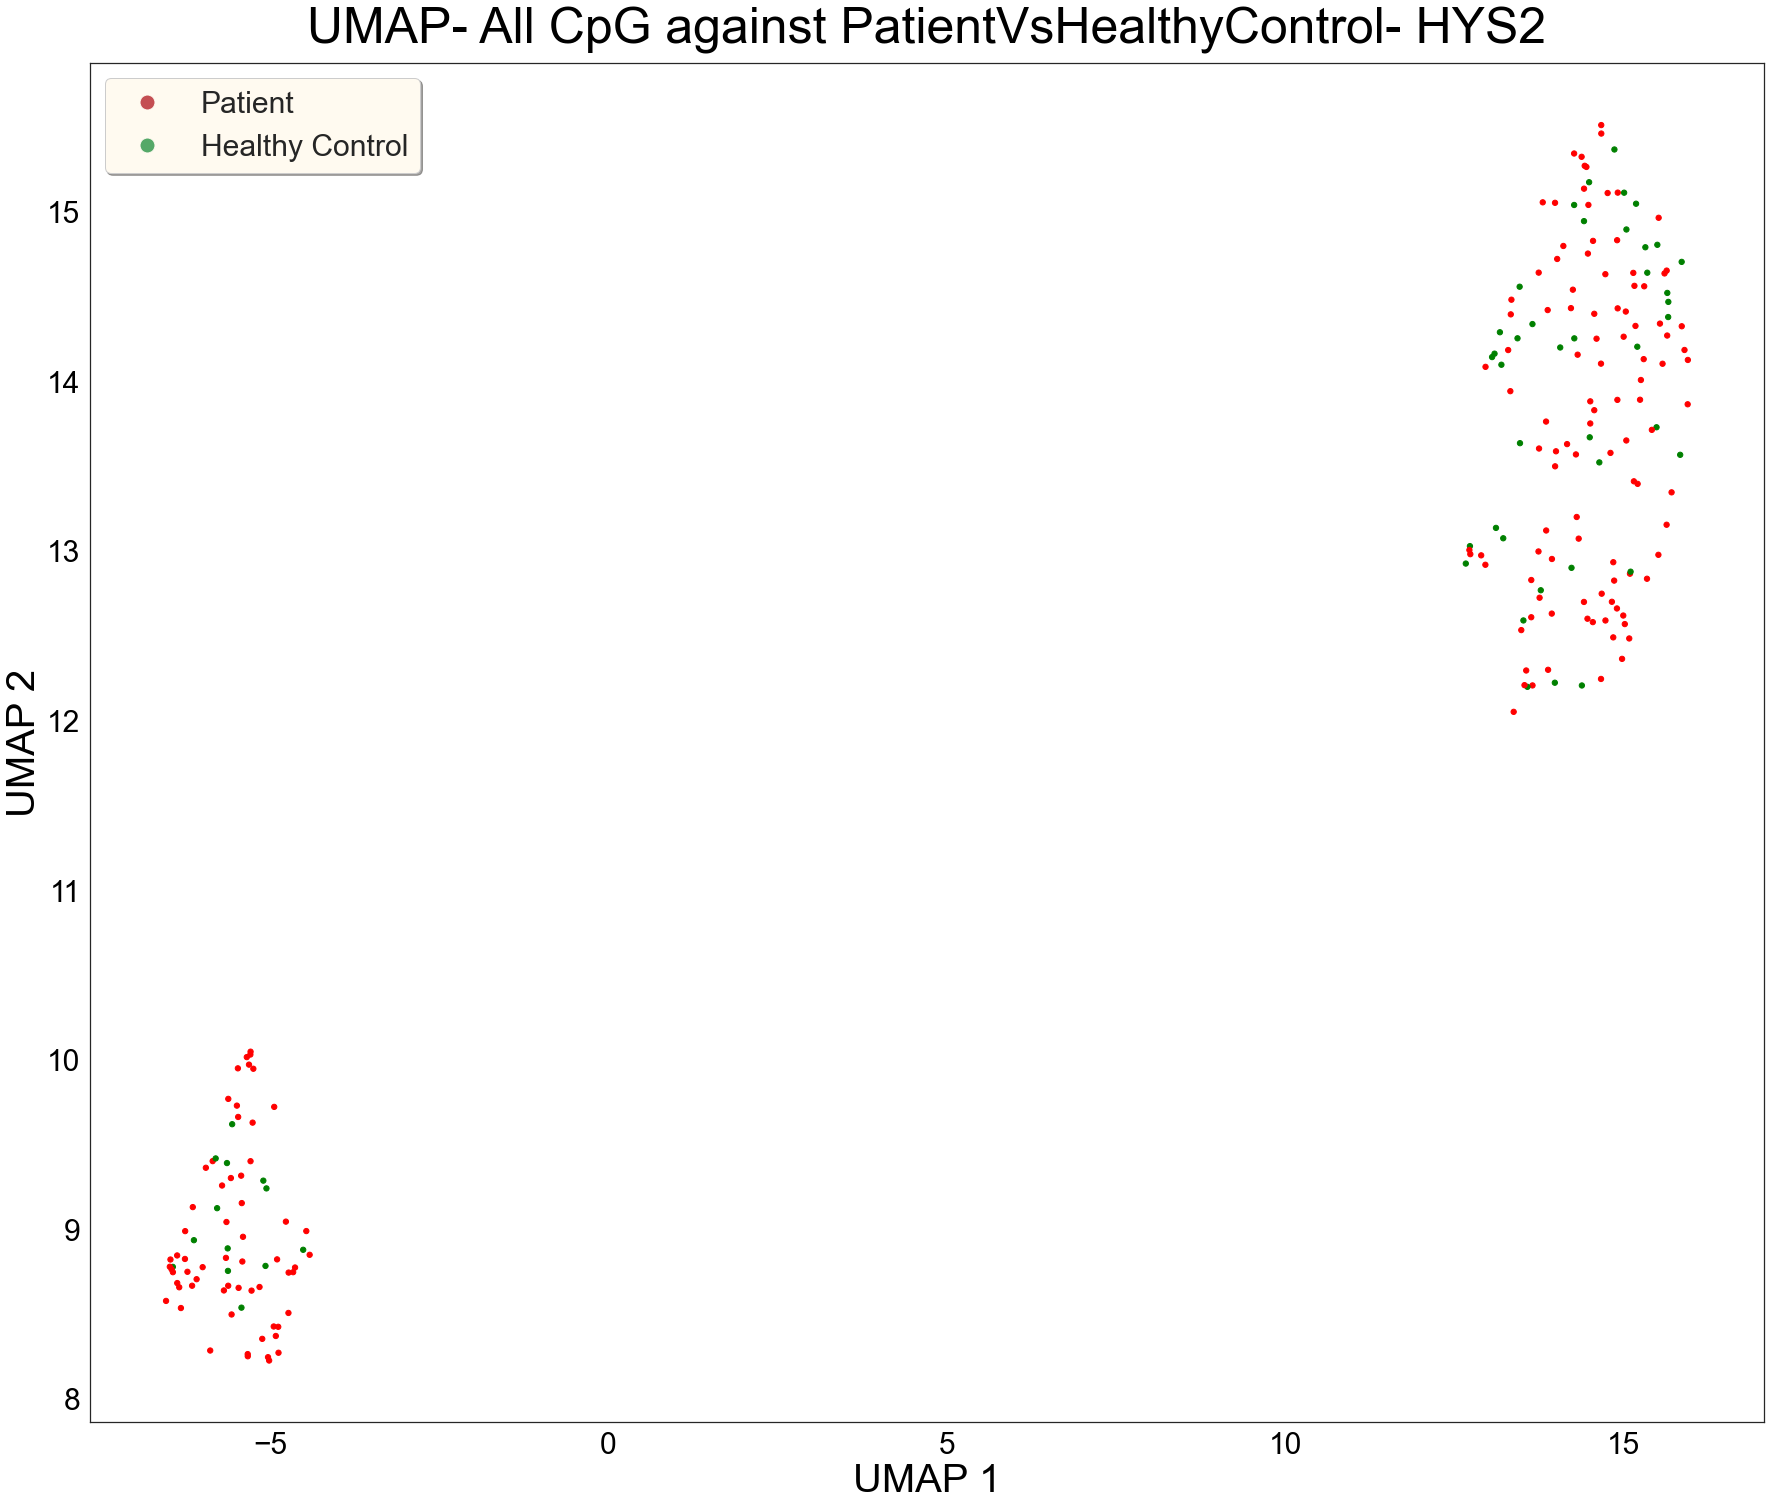

In [19]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
c=df_targets['APPRDX'].map(colors), s=28, cmap="Spectral");
plt.rcParams["figure.figsize"] = [30,25]
plt.title(label= "UMAP- All CpG against PatientVsHealthyControl- HYS2", fontsize=50, color='black', pad= 20)
plt.xlabel('UMAP 1', fontsize=40, color='black')
plt.ylabel('UMAP 2', fontsize=40, color='black')
plt.xticks(fontsize=30, color='black')
plt.yticks(fontsize=30, color='black')
plt.legend(custom_lines, ['Patient', 'Healthy Control'], loc='upper left',shadow = True,
           facecolor = 'floralwhite',prop = {'size' : 30})
plt.savefig("UMAP_All_CpG_against_HYS2_PatientVsHealthy.pdf", format="pdf")
plt.show()